In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('../data/match_data_from2009-to2015.csv',encoding='utf-8')

In [8]:
df.head()

,Date,HomeTeam,HomePoint,AwayTeam,AwayPoint,Studium,StartTime
0,2009-04-03,中,4,横,1,ナゴヤドーム,18:00
1,2009-04-03,巨,3,広,6,東京ドーム,18:00
2,2009-04-03,阪,5,ヤ,2,京セラD大阪,18:00
3,2009-04-03,日,1,楽,3,札幌ドーム,18:00
4,2009-04-03,ソ,8,オ,0,ヤフードーム,18:00


In [33]:
pd.options.mode.chained_assignment = None

In [34]:
df_cancel = df[df['HomePoint'] == '中止']
df_done = df[df['HomePoint'] != '中止']
df_done['Date'] = pd.to_datetime(df_done['Date'])
# convert to number
for col in ['HomePoint','AwayPoint']:
    df_done[col] = df_done[col].astype(int)

In [35]:
df_done.dtypes

Date         datetime64[ns]
HomeTeam             object
HomePoint             int64
AwayTeam             object
AwayPoint             int64
Studium              object
StartTime            object
dtype: object

In [36]:
df_done.index = df_done.Date

In [37]:
grouped = df_done.groupby(lambda x:x.month)

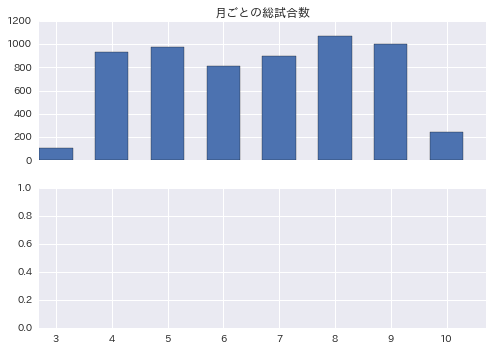

In [109]:
df_countmonth = grouped[['Date']].count()
sns.set_context('talk')
sns.set_style('ticks')

sns.set(font='IPAexGothic')
width = .6

fig,ax = plt.subplots(2,sharex=True)
ax[0].set_title('月ごとの総試合数')
ax[0].bar(df_countmonth.index.values,df_countmonth['Date'].values,width)
ax[0].set_xticks(df_countmonth.index.values+width/2.)
ax[0].set_xticklabels(df_countmonth.index)

In [38]:
h = grouped.aggregate({'mean','std'})

In [42]:
h

HomePoint           AwayPoint          
         std      mean       std      mean
3   3.068368  4.256881  2.856192  3.642202
4   2.956659  3.924145  3.053591  3.665598
5   2.938841  3.872821  2.893049  3.721026
6   2.988048  3.923267  3.080629  3.935644
7   2.884255  4.037778  2.994349  3.892222
8   2.927716  3.993458  3.175476  3.934579
9   2.778865  3.844689  2.911840  3.610220
10  2.706885  3.463415  2.804178  3.390244

In [48]:
h['HomePoint']['mean'].values

array([ 4.25688073,  3.9241453 ,  3.87282051,  3.92326733,  4.03777778,
        3.99345794,  3.84468938,  3.46341463])

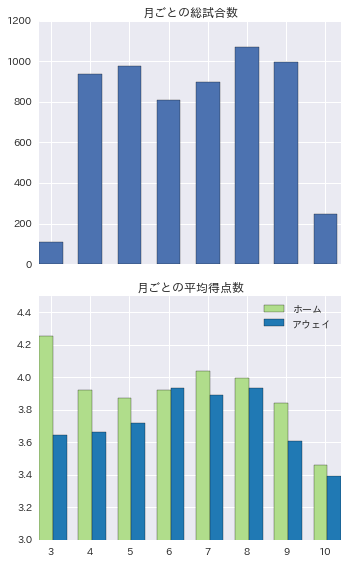

In [127]:
df_countmonth = grouped[['Date']].count()
sns.set_context('talk')
sns.set_style('ticks')

sns.set(font='IPAexGothic')
width = .6

fig,ax = plt.subplots(2,sharex=True,figsize=(5,8))
ax[0].set_title('月ごとの総試合数')
ax[0].bar(df_countmonth.index.values,df_countmonth['Date'].values,width)
ax[0].set_xticks(df_countmonth.index.values+width/2.)
ax[0].set_xticklabels(df_countmonth.index)


width = .35

ax[1].set_title('月ごとの平均得点数')
ax[1].bar(h.index.values,h['HomePoint']['mean'].values,width,
        color = sns.color_palette("Paired")[2],label='ホーム')
ax[1].bar(h.index.values+width,h['AwayPoint']['mean'].values,width,
        color = sns.color_palette("Paired")[1],label='アウェイ')
ax[1].set_ylim(3,4.5)
ax[1].legend()

plt.tight_layout()
plt.savefig('../figures/月ごとの平均得点推移.png',dpi=100)

In [39]:
df_mean = pd.DataFrame()
for cl in ['HomePoint','AwayPoint']:
    df_mean[cl+' mean'] = h[cl]['mean']

In [40]:
df_mean.columns.values

array(['HomePoint mean', 'AwayPoint mean'], dtype=object)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/home-away_mean_month.png'

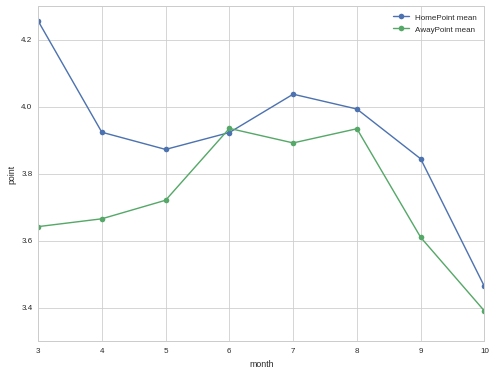

In [41]:
import seaborn as sns
sns.set_context('paper')
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
for cl in df_mean.columns:
    plt.plot(df_mean.index,df_mean[cl],'o-',label=cl)
plt.legend()
plt.xlabel('month')
plt.ylabel('point')
plt.savefig('figures/home-away_mean_month.png',dpi=120)

In [92]:
h.columns

MultiIndex(levels=[['HomePoint', 'AwayPoint'], ['std', 'mean']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [74]:
pd.unique(df['HomeTeam'])

array(['中', '巨', '阪', '日', 'ソ', 'ロ', 'ヤ', '横', '楽', '西', '広', 'オ', 'D'], dtype=object)

In [ ]:
npb.fetch_maching_dataframe()

In [ ]:
from npbdata import fetch_machdata

In [ ]:
fetch_machdata.fetch_matching_dataframe(start=2009,end=2016)